**Part 1: Data Preprocessing**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score,classification_report
from sklearn.preprocessing import StandardScaler

data = pd.read_csv('/content/Netflix_Userbase.csv')
print(data.head())

   User ID Subscription Type  Monthly Revenue Join Date Last Payment Date  \
0        1             Basic               10  15-01-22          10-06-23   
1        2           Premium               15  05-09-21          22-06-23   
2        3          Standard               12  28-02-23          27-06-23   
3        4          Standard               12  10-07-22          26-06-23   
4        5             Basic               10  01-05-23          28-06-23   

          Country  Age  Gender      Device Plan Duration  
0   United States   28    Male  Smartphone       1 Month  
1          Canada   35  Female      Tablet       1 Month  
2  United Kingdom   42    Male    Smart TV       1 Month  
3       Australia   51  Female      Laptop       1 Month  
4         Germany   33    Male  Smartphone       1 Month  


In [ ]:
data.isnull().sum()

User ID              0
Subscription Type    0
Monthly Revenue      0
Join Date            0
Last Payment Date    0
Country              0
Age                  0
Gender               0
Device               0
Plan Duration        0
dtype: int64

In [ ]:
netflix_data = pd.get_dummies(data, columns=[ 'Country', 'Join Date', 'Last Payment Date', 'Gender', 'Device', 'Plan Duration'],drop_first=True)
print(data_encoded)

      User ID  Monthly Revenue Join Date Last Payment Date  Age  \
0           1               10  15-01-22          10-06-23   28   
1           2               15  05-09-21          22-06-23   35   
2           3               12  28-02-23          27-06-23   42   
3           4               12  10-07-22          26-06-23   51   
4           5               10  01-05-23          28-06-23   33   
...       ...              ...       ...               ...  ...   
2495     2496               14  25-07-22          12-07-23   28   
2496     2497               15  04-08-22          14-07-23   33   
2497     2498               12  09-08-22          15-07-23   38   
2498     2499               13  12-08-22          12-07-23   48   
2499     2500               15  13-08-22          12-07-23   35   

      Subscription Type_Premium  Subscription Type_Standard  Country_Brazil  \
0                             0                           0               0   
1                             1      

In [ ]:
data_dummies['the income'] = (data['Monthly Revenue']>1).astype(int)
x = data_dummies.drop(['Monthly Revenue', 'Age'],axis=1)
y = data_dummies['the income']

I chose monthly revenue as the feature to be included in regression model because it is the main objective and relate to that the income. I also use age as a feature because it can determine the data of what age group subscribes more by the monthly revenue.

In [ ]:
X = netflix_data.drop('Monthly Revenue', axis=1)
y = netflix_data['Age']

**Part 2: Exploratory Data Analysis (EDA)**

In [ ]:
data.describe()

,User ID,Monthly Revenue,Age
count,2500.00000,2500.000000,2500.000000
mean,1250.50000,12.508400,38.795600
std,721.83216,1.686851,7.171778
min,1.00000,10.000000,26.000000
25%,625.75000,11.000000,32.000000
50%,1250.50000,12.000000,39.000000
75%,1875.25000,14.000000,45.000000
max,2500.00000,15.000000,51.000000


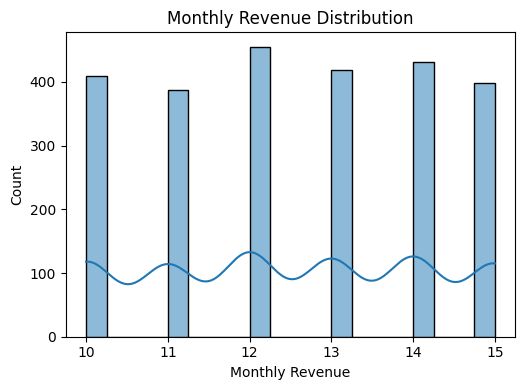

In [ ]:
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
sns.histplot(y_revenue, bins=20, kde=True)
plt.title('Monthly Revenue Distribution')

plt.tight_layout()
plt.show()

In [ ]:
country_counts = data['Country'].value_counts().reset_index()
country_counts.columns = ['Country', 'User Count']

fig = px.choropleth(country_counts, locations='Country', locationmode='country names',
                    color='User Count', hover_name='Country',
                    title='Number of Users by Country',
                    color_continuous_scale='Plasma')

fig.show()

**Part 3: Linear Regression Model (Predicting Monthly Revenue)**

Build the Model:

In [ ]:
X = data[['Monthly Revenue']]
Y = data['Age']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=80)


In [ ]:
linear_reg_model = LinearRegression()

linear_reg_model.fit(X_train, y_train)


LinearRegression()

In [ ]:
slope = model.coef_[0]
intercept = model.intercept_
print("Slope", slope)
print("Intercept", intercept)

Slope [-1.43679158e+01  1.15208853e-01  1.51480761e-02  5.74496680e-02
  4.41485702e-02 -6.67791950e-02  9.92854860e-02  3.64298609e-02
  6.01608151e-02 -5.76046147e-03  5.35108072e-02  4.87264607e-04
 -1.13895836e-04  0.00000000e+00  5.68239031e-02  8.19123221e-02
  3.50110774e-02  6.24529761e-02 -9.99107830e-03  8.38512930e-04
 -5.12416220e-04 -5.54317143e-02  4.46540831e-02  1.04480996e-01
  2.82232347e-03  7.92149107e-02  1.67716325e-02 -1.09240728e-02
  7.70581105e-04 -4.86305403e-02  6.05774237e-04  7.96315090e-04
 -4.44192091e-02 -1.38211978e-01 -3.88695328e-03 -2.84353448e-03
  6.71302901e-02  6.07848551e-04  5.70937415e-04  5.44087582e-04
 -5.30660254e-04  0.00000000e+00 -5.25739549e-02 -3.32751465e-02
 -8.37977588e-02 -1.28956047e-01  4.06104003e-02  5.55263049e-04
  1.12721096e-02 -3.29777621e-02  1.92745682e-04 -1.98982117e-02
 -1.66689967e-03  0.00000000e+00 -6.44839109e-02  5.24479334e-02
 -2.04216090e-02  1.37680874e-02  2.23497759e-02  3.20446786e-02
  7.98949560e-04 -1

Model Evaluation:

In [ ]:
revenue_predictions = linear_reg_model.predict(X_test)

mse = mean_squared_error(y_test, revenue_predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, revenue_predictions)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared Score:", r2)

Mean Squared Error (MSE): 48.34679390183033
Root Mean Squared Error (RMSE): 6.953185881438115
R-squared Score: 0.001313563184495048


**Part 4: Logistic Regression Model (Predicting Customer Feedback)**

Model Building:

In [ ]:
x = netflix_data.drop('Subscription Type', axis=1)
y = netflix_data['Subscription Type']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [ ]:
logistic_reg_model = LogisticRegression(multi_class='auto', max_iter=1000)

logistic_reg_model.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression(max_iter=1000)

Evaluation:

In [ ]:
subscription_type_predictions = logistic_reg_model.predict(x_test)

accuracy = accuracy_score(y_test, subscription_type_predictions)
precision = precision_score(y_test, subscription_type_predictions, average='weighted')
recall = recall_score(y_test, subscription_type_predictions, average='weighted')
f1 = f1_score(y_test, subscription_type_predictions, average='weighted')
conf_matrix = confusion_matrix(y_test, subscription_type_predictions)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.604
Precision: 0.6241382889200561
Recall: 0.604
F1-score: 0.6033374790632279
Confusion Matrix:
[[133  38  14]
 [ 50  82  14]
 [ 47  35  87]]


**Part 5: Comparative Analysis and Visualization**

Feature Importance:

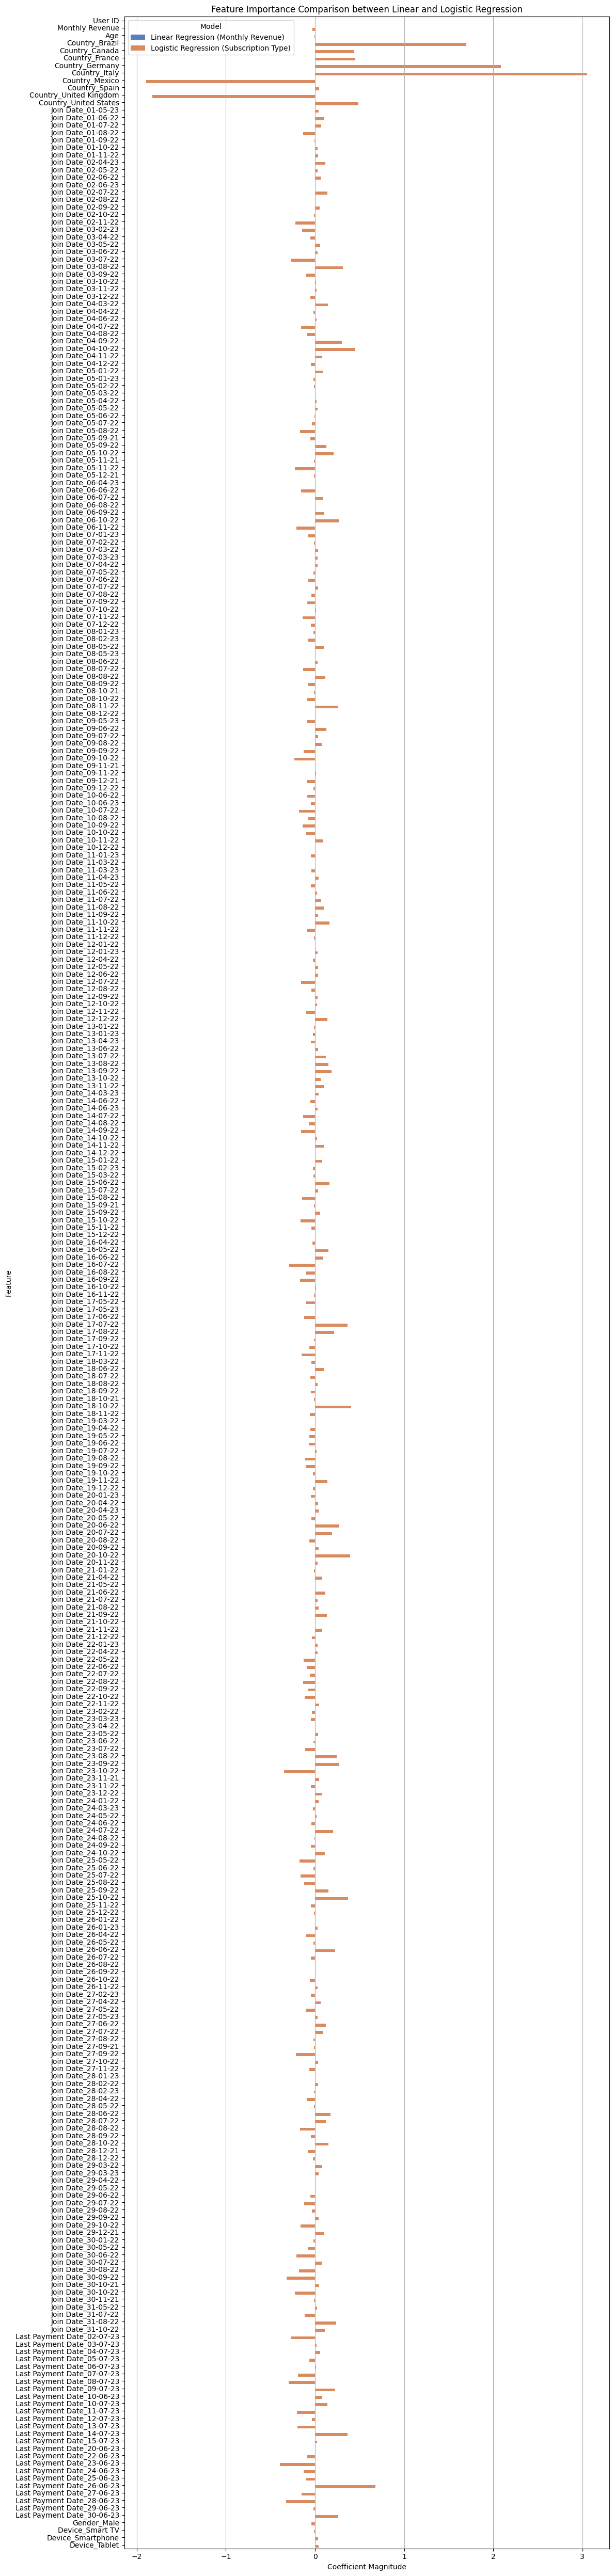

In [ ]:
coefficients_df = pd.DataFrame({
    'Feature': feature_names,
    'Linear Regression (Monthly Revenue)': linear_reg_coefficients,
    'Logistic Regression (Subscription Type)': logistic_reg_coefficients
})

coefficients_df_melted = pd.melt(coefficients_df, id_vars=['Feature'], var_name='Model', value_name='Coefficient')

plt.figure(figsize=(12, 50))
sns.barplot(data=coefficients_df_melted, y='Feature', x='Coefficient', hue='Model', palette='muted')
plt.xlabel('Coefficient Magnitude')
plt.ylabel('Feature')
plt.title('Feature Importance Comparison between Linear and Logistic Regression')
plt.grid(axis='x')

plt.tight_layout()
plt.show()

Insights

Monthly Revenue is predicted by the linear regression model depending on variables such as Age. The model's line's slope shows how Age affects Revenue; a positive slope suggests that Age tends to increase Revenue, while a negative slope suggests the opposite.

When Age is zero, the intercept is the Revenue. Based on factors that are scaled, the logistic regression model forecasts binary results. A given outcome's likelihood is indicated by positive coefficients, which point to contributing factors, and its likelihood is indicated by negative coefficients.

Base on the graph, the significance of both features in regression model and it was shown the difference of data between the features. The models, in summary, show how Age and other factors impact Monthly Revenue, providing direction for decision-making and ideas for strategies to boost Revenue in light of these factors.

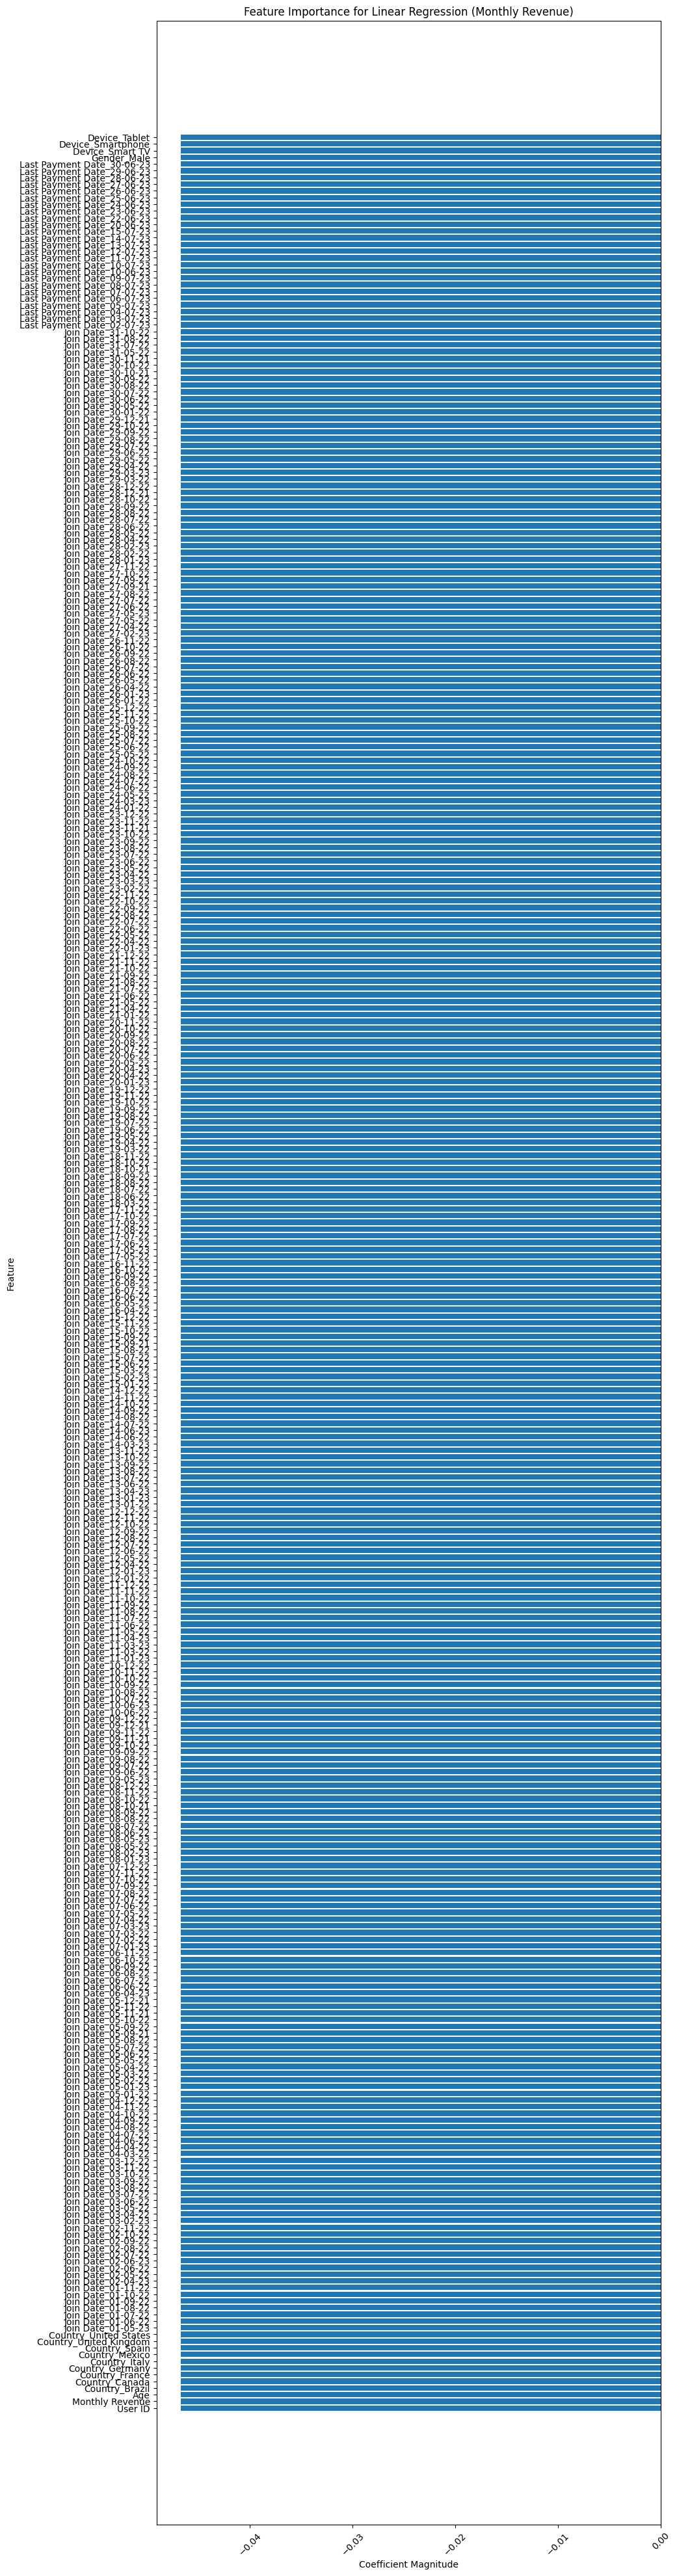

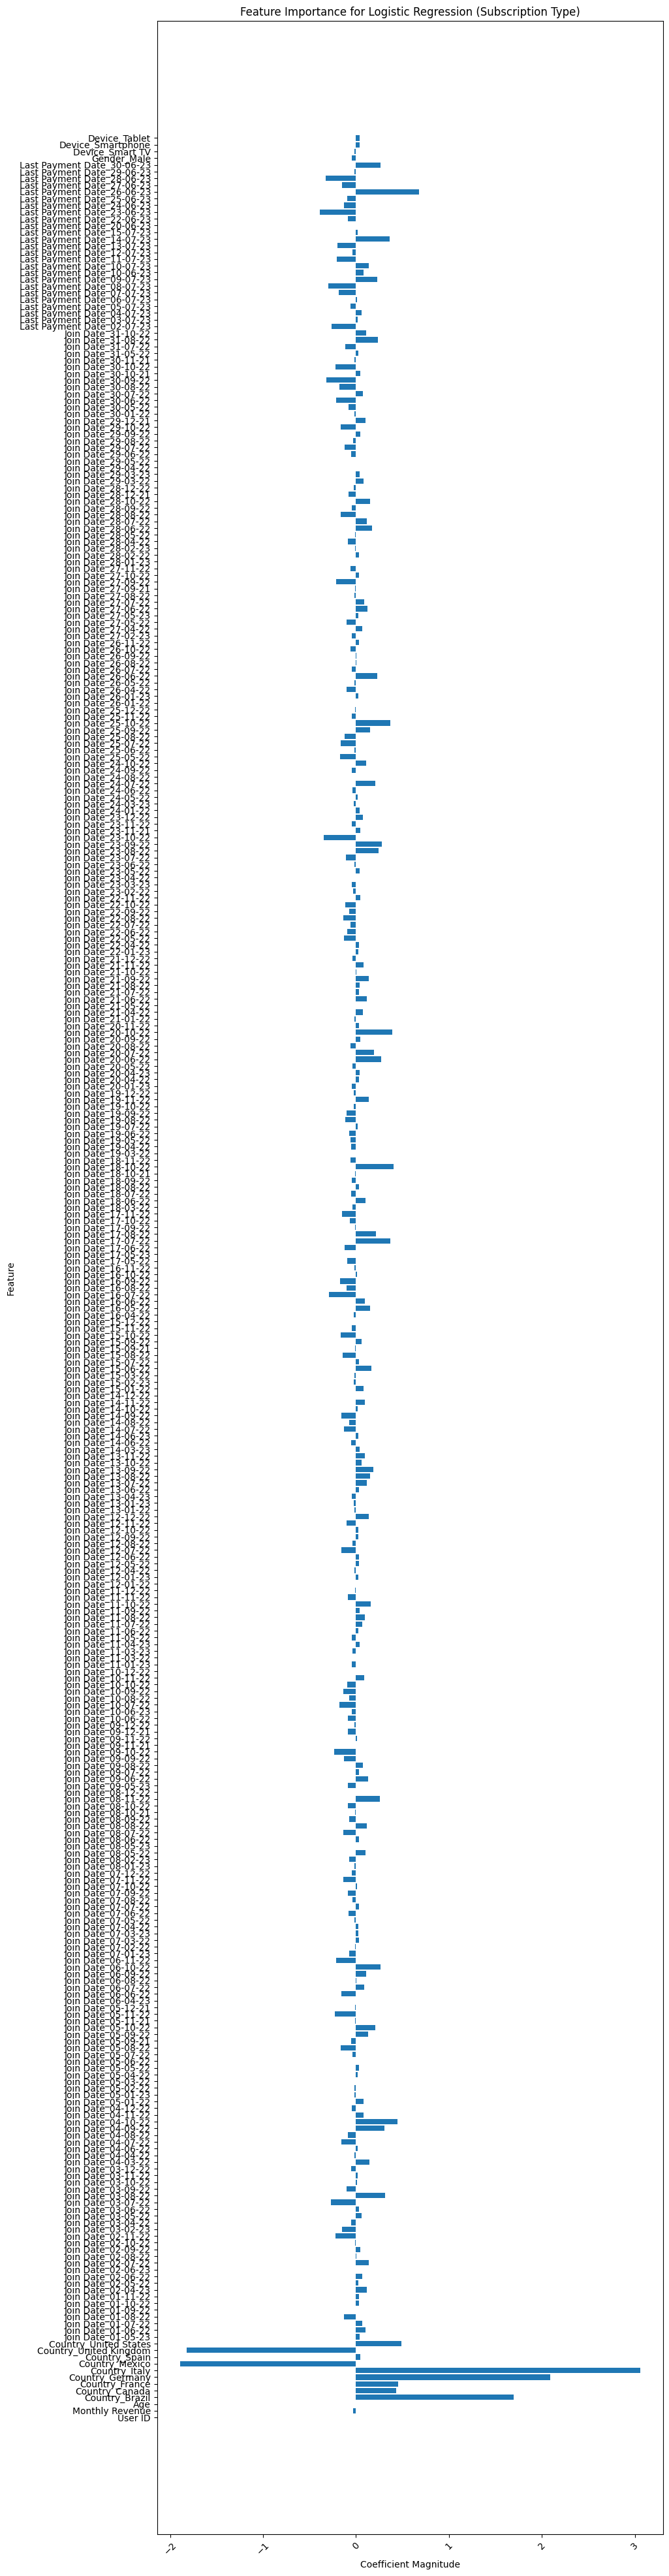

In [ ]:
linear_reg_coefficients = linear_reg_model.coef_[0]
feature_names = x.columns

plt.figure(figsize=(10, 50))
plt.barh(feature_names, linear_reg_coefficients)
plt.xlabel('Coefficient Magnitude')
plt.ylabel('Feature')
plt.title('Feature Importance for Linear Regression (Monthly Revenue)')
plt.xticks(rotation=45)
plt.show()

logistic_reg_coefficients = logistic_reg_model.coef_[0]
feature_names = x.columns
plt.figure(figsize=(10, 50))
plt.barh(feature_names, logistic_reg_coefficients)
plt.xlabel('Coefficient Magnitude')
plt.ylabel('Feature')
plt.title('Feature Importance for Logistic Regression (Subscription Type)')
plt.xticks(rotation=45)
plt.show()

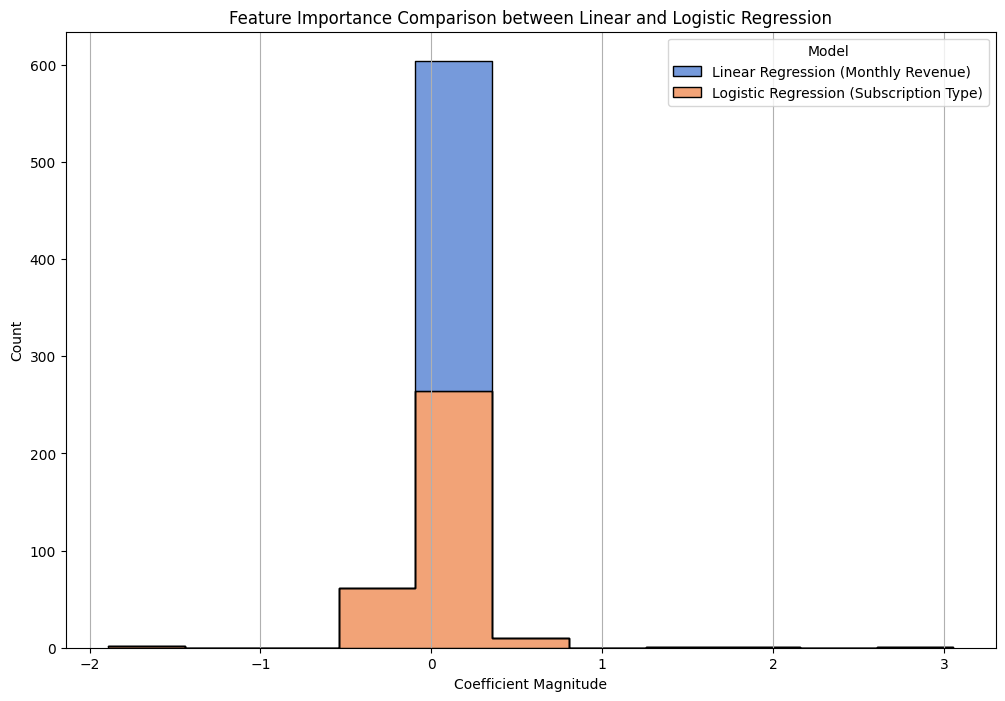

In [ ]:
coefficients_df = pd.DataFrame({
    'Feature': feature_names,
    'Linear Regression (Monthly Revenue)': linear_reg_coefficients,
    'Logistic Regression (Subscription Type)': logistic_reg_coefficients
})

coefficients_df_melted = pd.melt(coefficients_df, id_vars=['Feature'], var_name='Model', value_name='Coefficient')

plt.figure(figsize=(12, 8))
sns.histplot(data=coefficients_df_melted, x='Coefficient', hue='Model', element='step', stat='count', multiple='stack', palette='muted')
plt.xlabel('Coefficient Magnitude')
plt.ylabel('Count')
plt.title('Feature Importance Comparison between Linear and Logistic Regression')
plt.grid(axis='x')
plt.show()

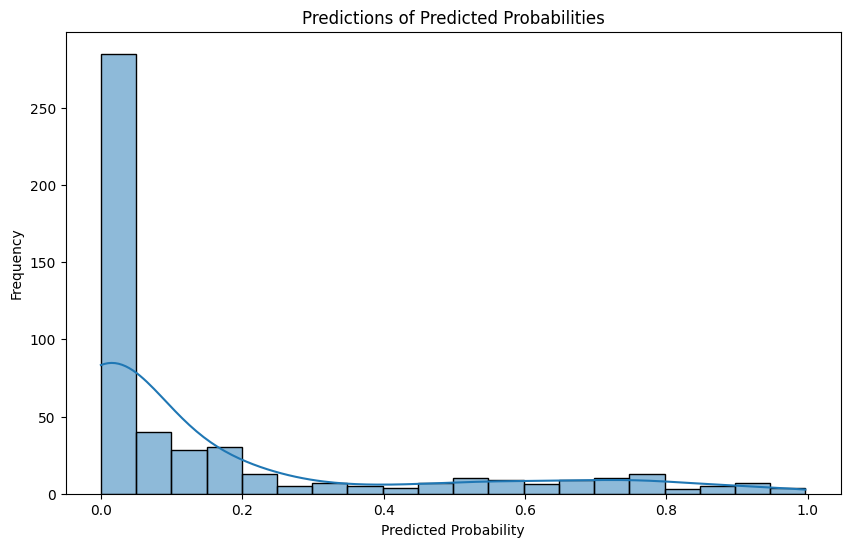

In [ ]:
y_pred_prob = model.predict_proba(X_test_scaled)[:,1]

plt.figure(figsize=(10, 6))
plt.title("Predictions of Predicted Probabilities")
sns.histplot(y_pred_prob, bins=20, kde=True)
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.show()

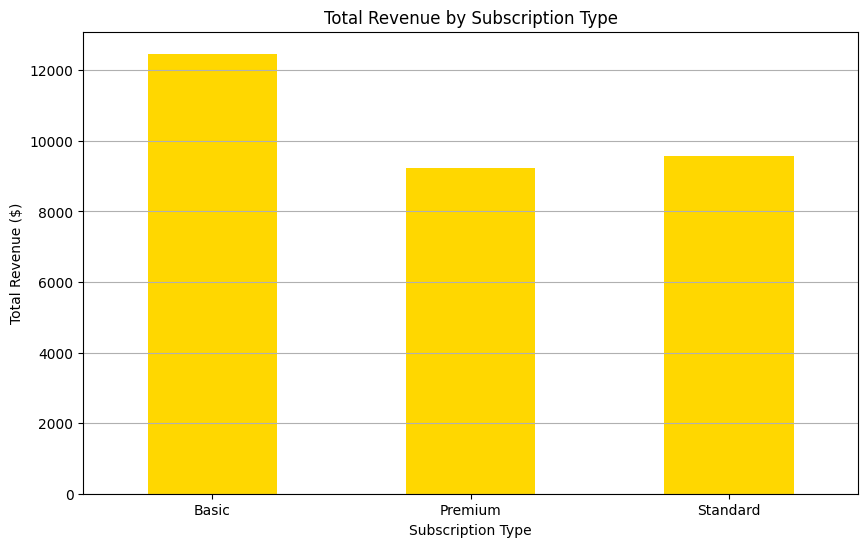

In [ ]:
revenue_by_subscription = netflix_data.groupby('Subscription Type')['Monthly Revenue'].sum()

plt.figure(figsize=(10, 6))
revenue_by_subscription.plot(kind='bar', color='gold')
plt.title('Total Revenue by Subscription Type')
plt.xlabel('Subscription Type')
plt.ylabel('Total Revenue ($)')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()